### Подключение модулей

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import tensorflow as tf
from tensorflow import keras

2026-01-28 12:38:37.768380: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-28 12:38:37.768622: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-28 12:38:37.801913: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-28 12:38:38.984902: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation or

Целью этого проекта является прогнозирование и анализ цен продажи жилья в США. Требуется построить регрессионную модель для прогнозирования цен на жилье в США на основе различных факторов.


### Загрузка данных

In [5]:
url = "https://raw.githubusercontent.com/PraveenObulreddy/USA-Housing-Price-Prediction/main/USA_Housing.csv"
df = pd.read_csv(url)

In [6]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Данные содержат следующие столбцы:
- __Avg. Area Income__ (Сред. Доход от района): Средний доход жителей города по региону.
- __Avg. Area House Age__ (Сред. Площадь дома): Средний возраст домов в районе.
- __Avg. Area Number of Rooms__ (Сред. Площадь Количество комнат): Среднее количество комнат в домах в том же городе.
- __Avg. Area Number of Bedrooms__ (Сред. Площадь Количество спален): Среднее количество спален в домах в том же городе.
- __Area Population__ (Население региона): Население городского дома, в котором находится.
- __Price__ (Цена): Цена, по которой был продан дом.
- __Address__ (Адрес): Адрес дома.
    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [9]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [10]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000
mean,68583.1090,5.9772,6.9878,3.9813,36163.5160,1232072.6541
std,10657.9912,0.9915,1.0058,1.2341,9925.6501,353117.6266
min,17796.6312,2.6443,3.2362,2.0000,172.6107,15938.6579
25%,61480.5624,5.3223,6.2993,3.1400,29403.9287,997577.1350
50%,68804.2864,5.9704,7.0029,4.0500,36199.4067,1232669.3780
75%,75783.3387,6.6508,7.6659,4.4900,42861.2908,1471210.2042
max,107701.7484,9.5191,10.7596,6.5000,69621.7134,2469065.5942


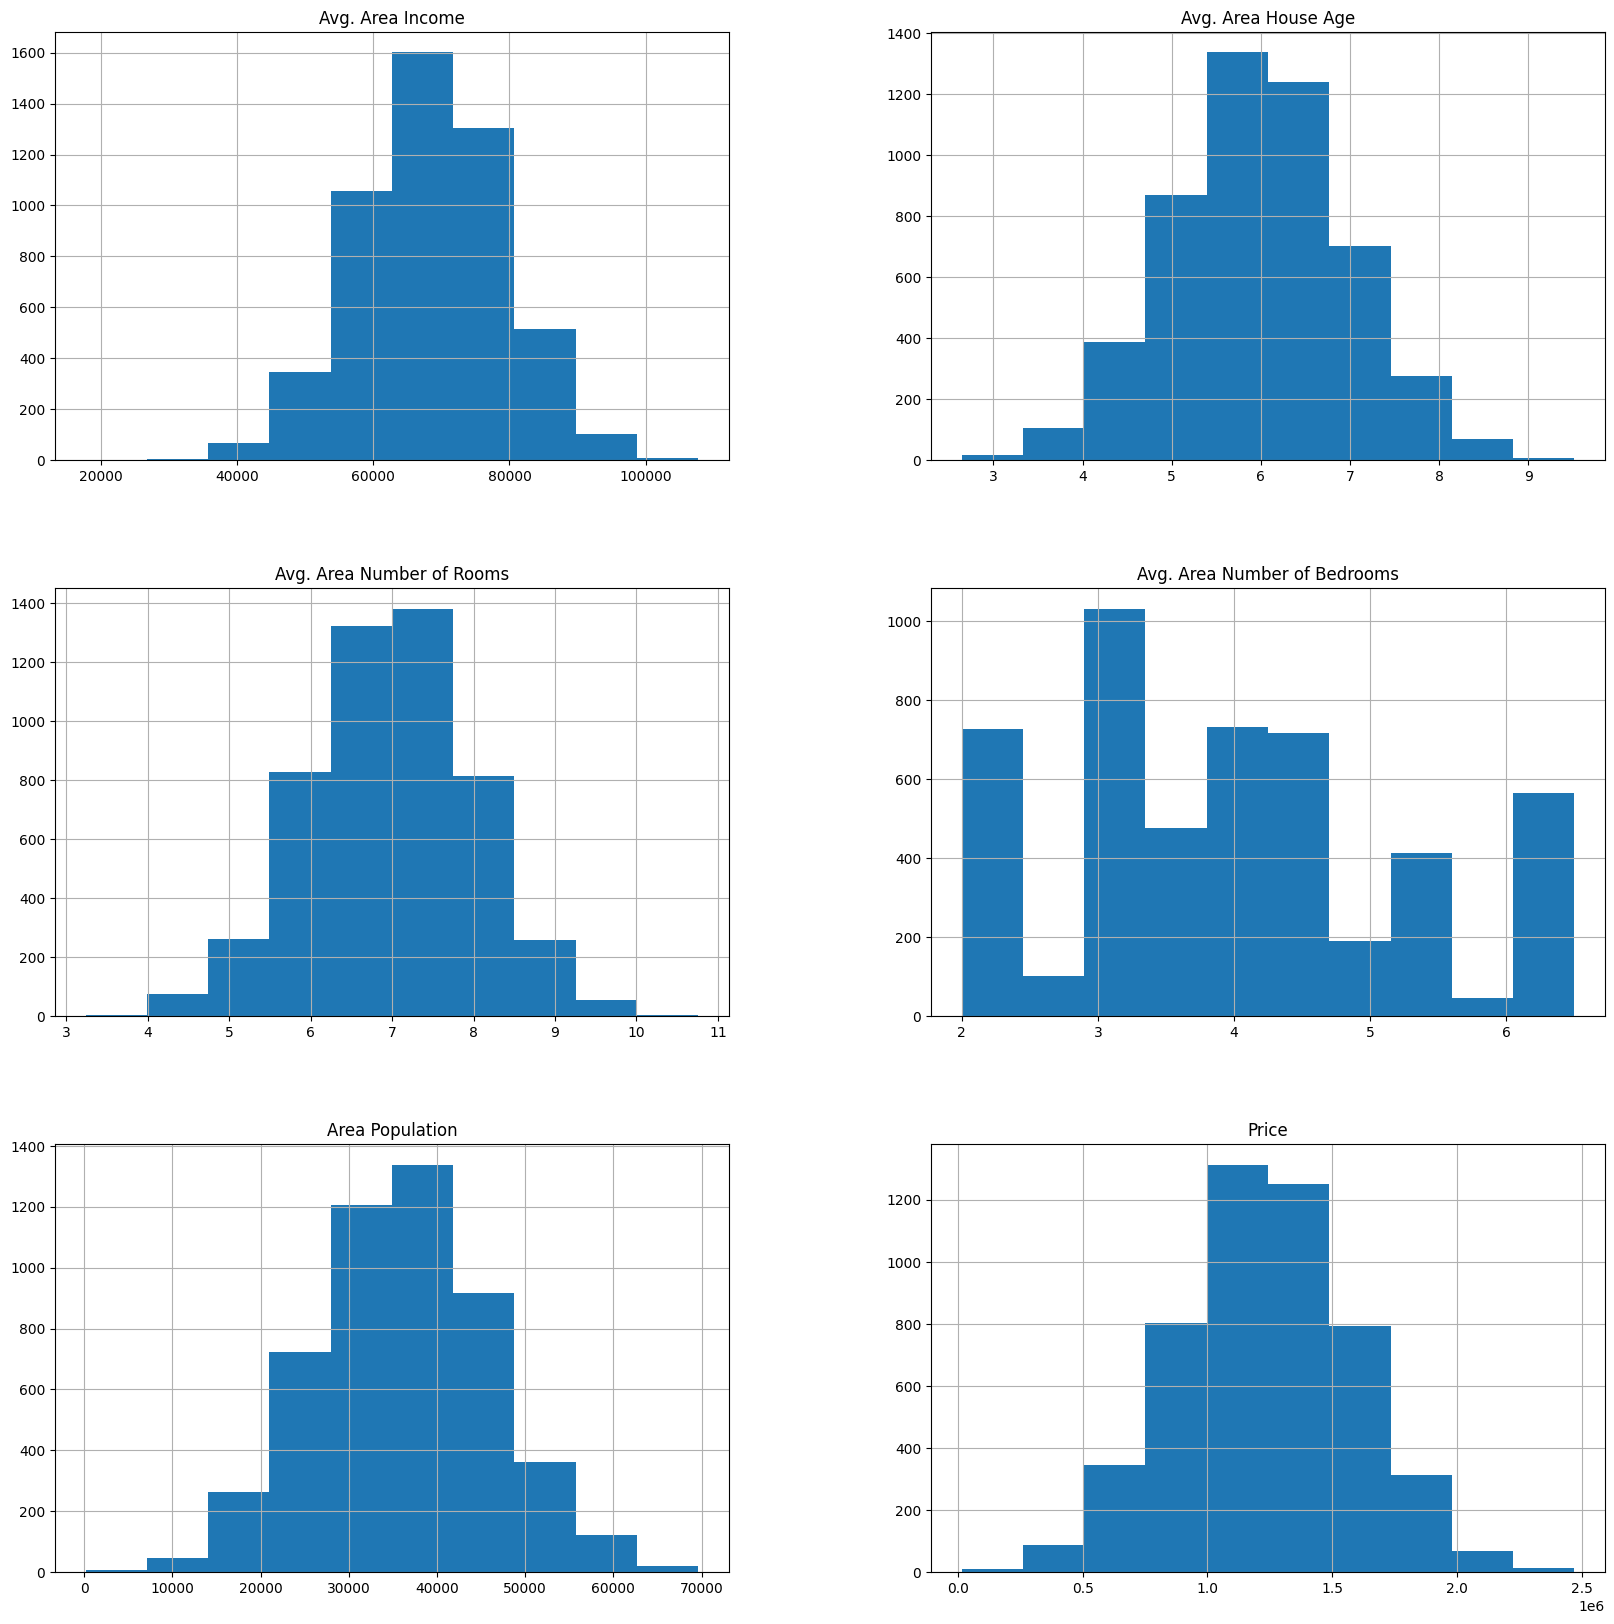

In [11]:
df.hist(figsize=(20,20));

<Figure size 800x600 with 0 Axes>

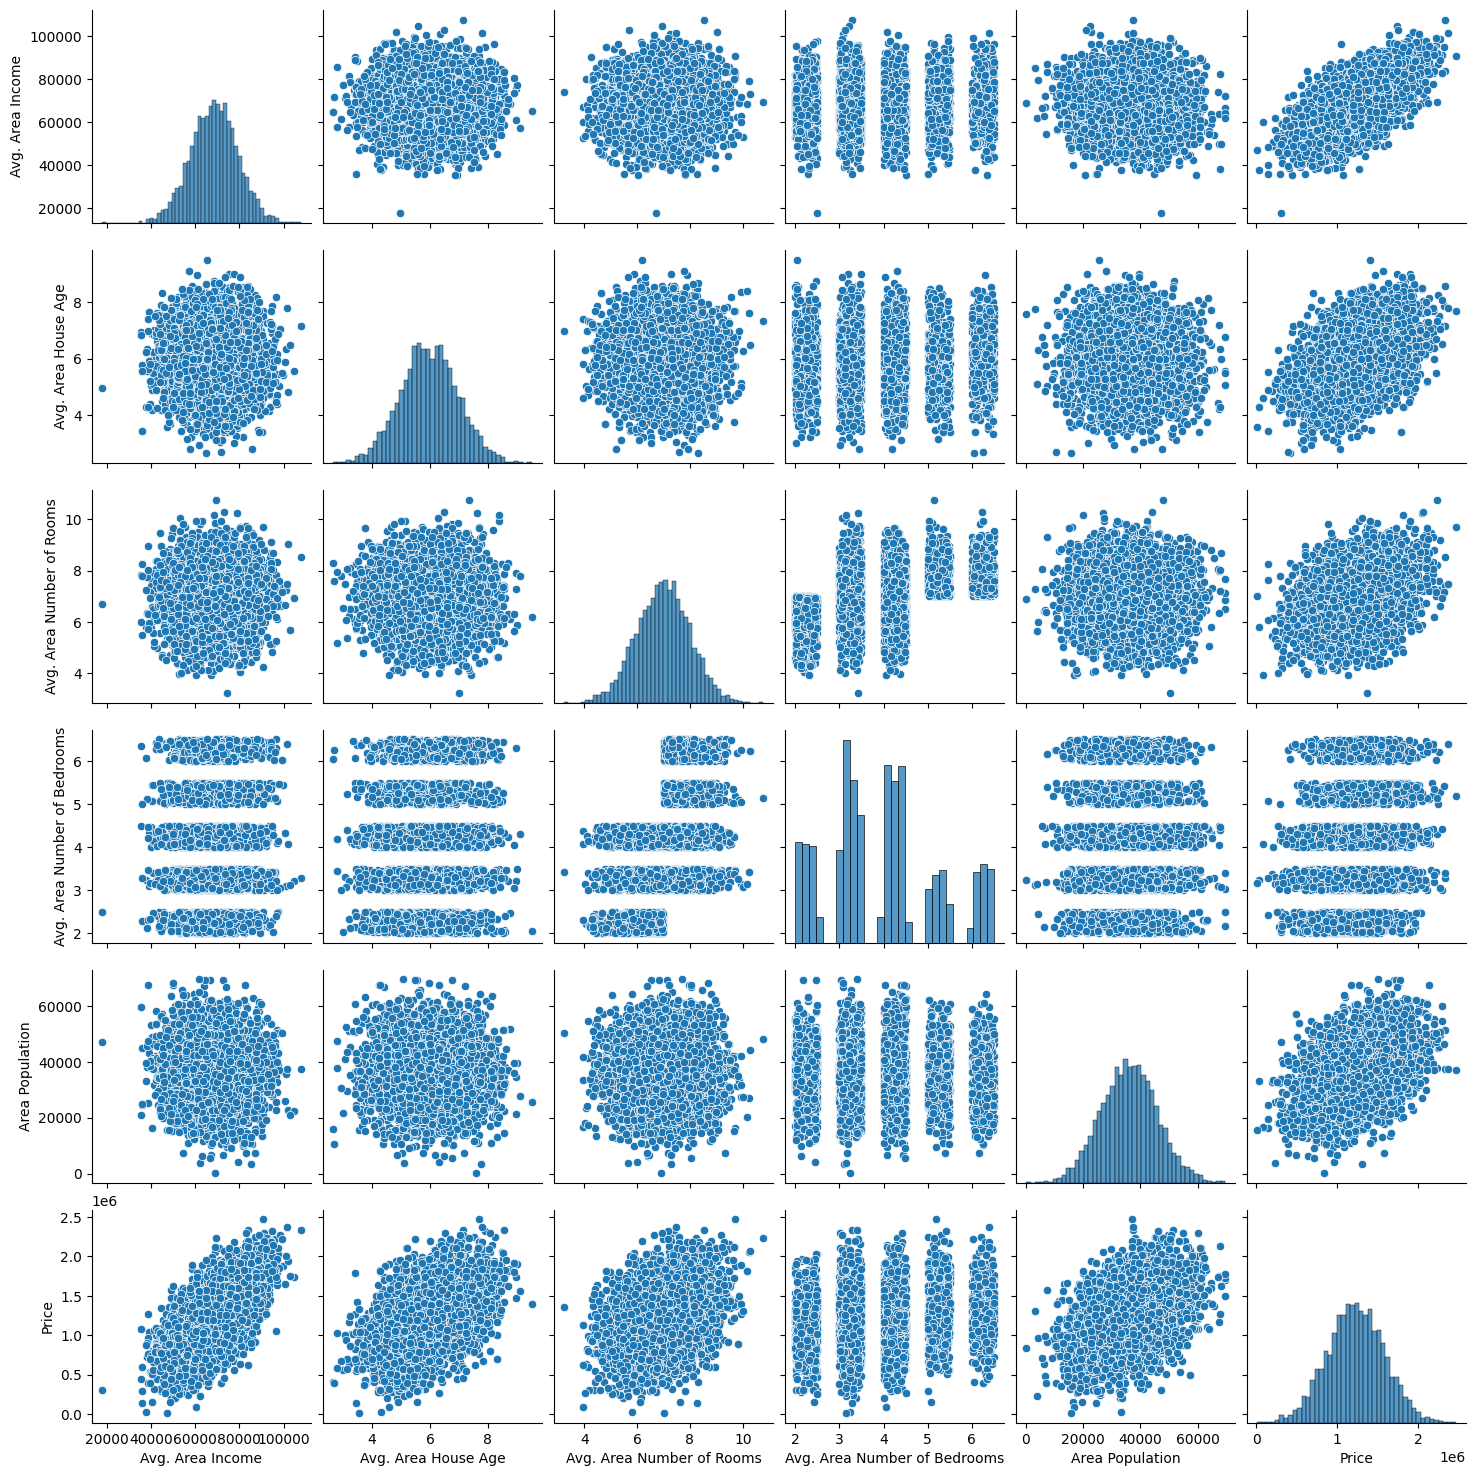

In [12]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

<Axes: xlabel='Price', ylabel='Density'>

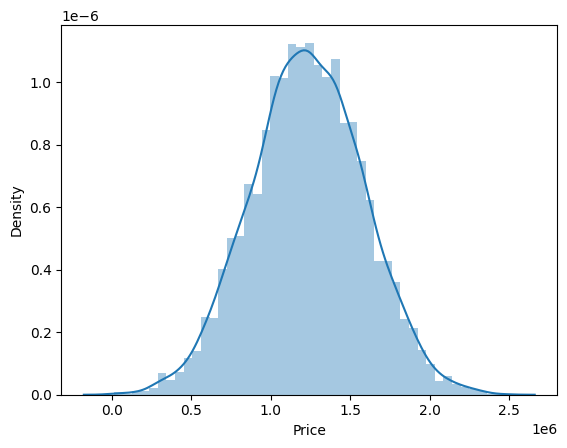

In [13]:
sns.distplot(df['Price'])

<Axes: xlabel='Avg. Area Income', ylabel='Price'>

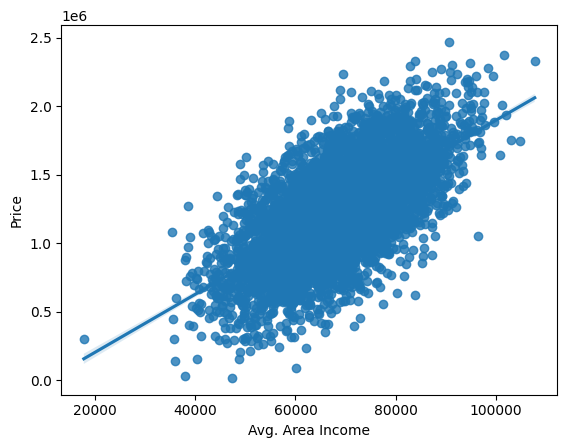

In [14]:
sns.regplot(y='Price', x='Avg. Area Income', data=df)

In [15]:
df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.0000,-0.0020,-0.0110,0.0198,-0.0162,0.6397
Avg. Area House Age,-0.0020,1.0000,-0.0094,0.0061,-0.0187,0.4525
Avg. Area Number of Rooms,-0.0110,-0.0094,1.0000,0.4627,0.0020,0.3357
Avg. Area Number of Bedrooms,0.0198,0.0061,0.4627,1.0000,-0.0222,0.1711
Area Population,-0.0162,-0.0187,0.0020,-0.0222,1.0000,0.4086
Price,0.6397,0.4525,0.3357,0.1711,0.4086,1.0000


<Axes: >

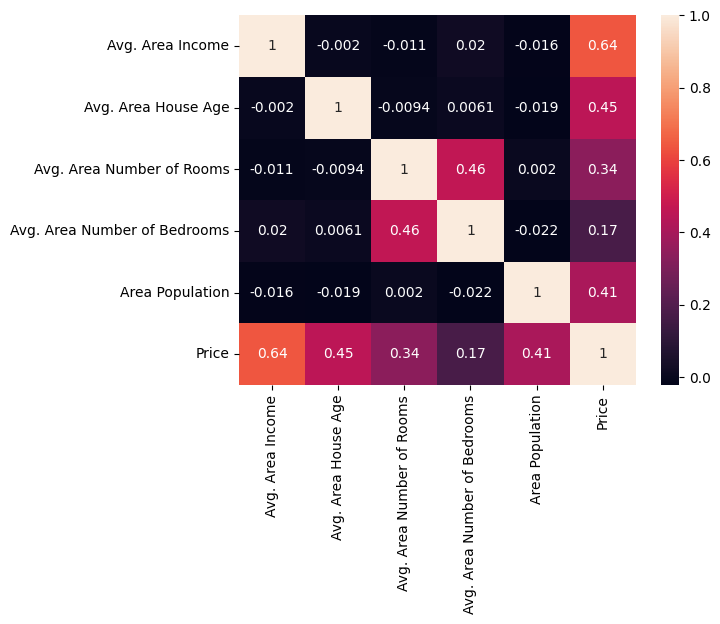

In [16]:
sns.heatmap(df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr(), annot=True)

In [17]:
df['House Age'] = df['Avg. Area House Age'].apply(int)

<Axes: xlabel='House Age', ylabel='Price'>

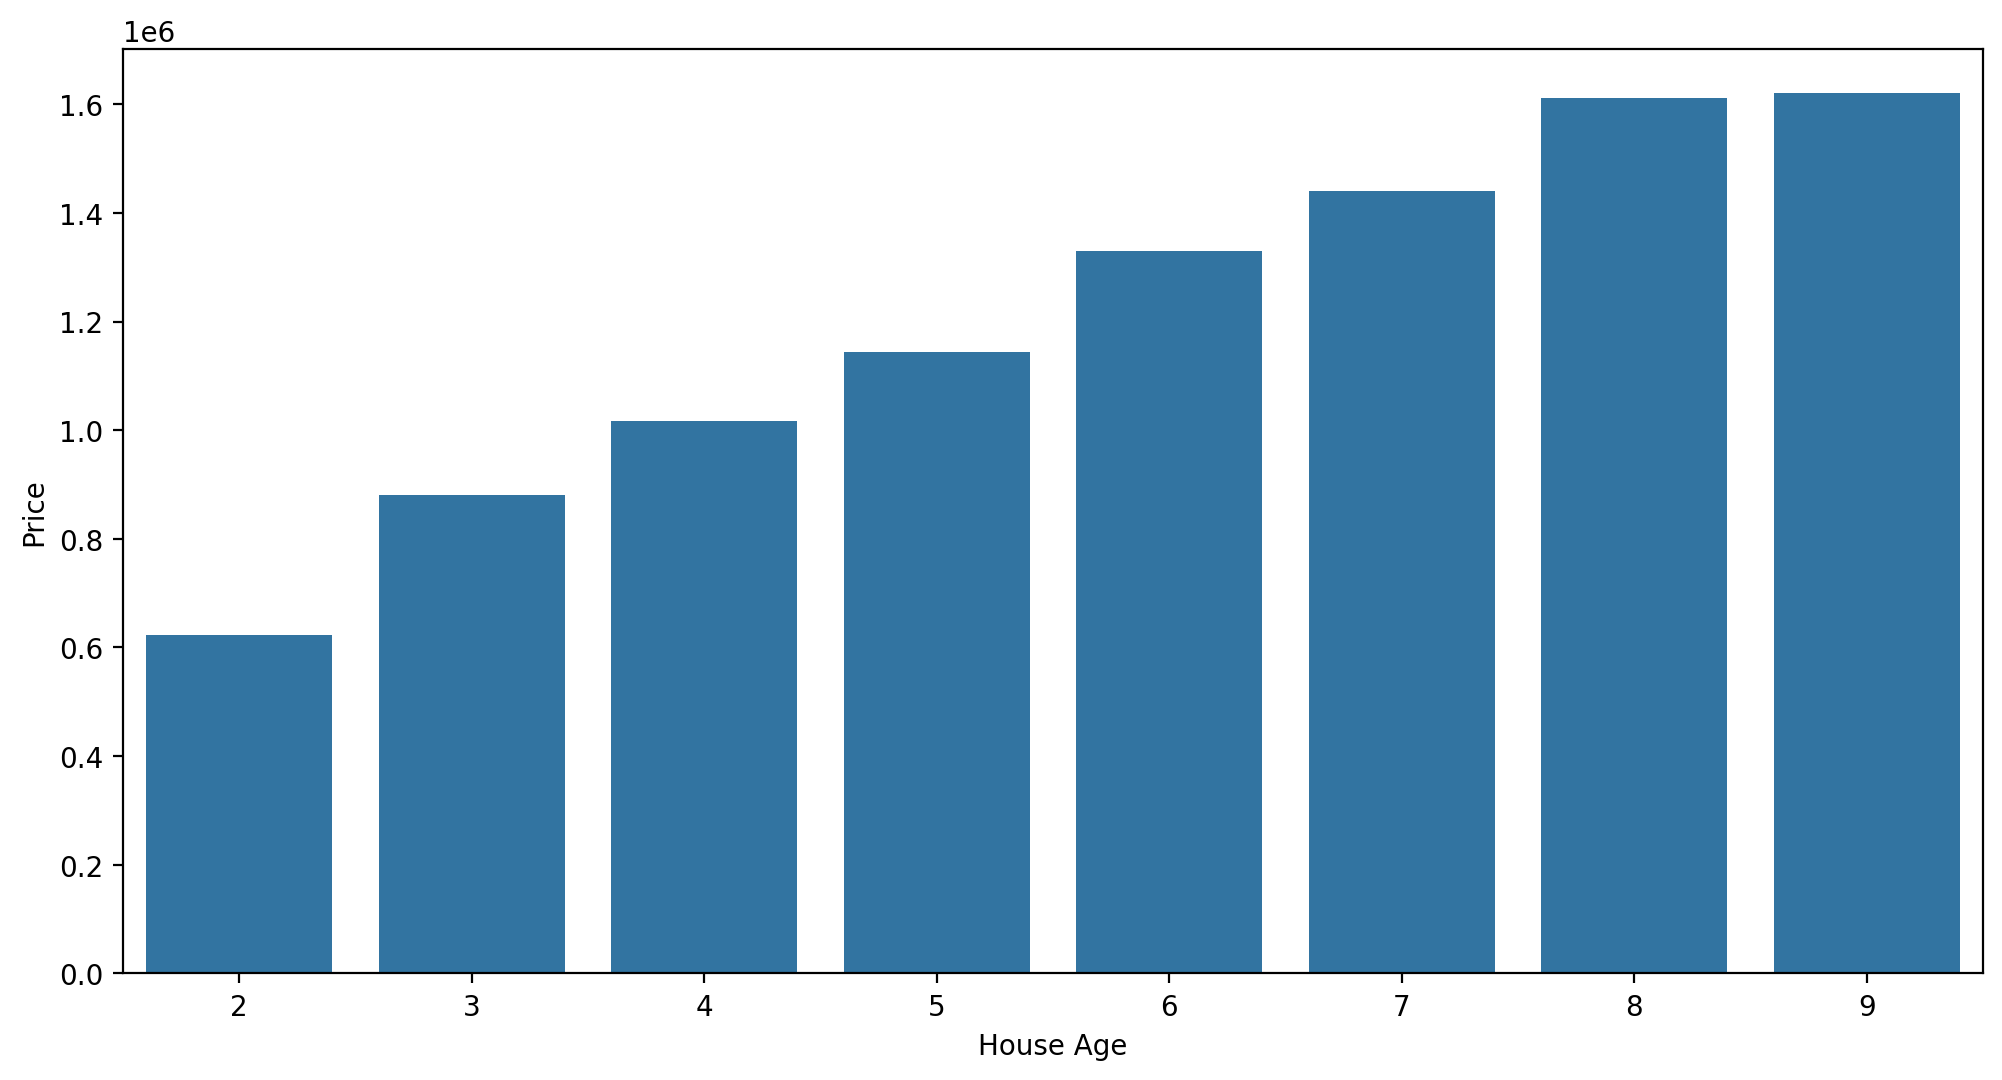

In [18]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'House Age', y = 'Price', data = df, ci = None)

In [19]:
df['Number of Rooms'] = df['Avg. Area Number of Rooms'].apply(int)

<Axes: xlabel='Number of Rooms', ylabel='Price'>

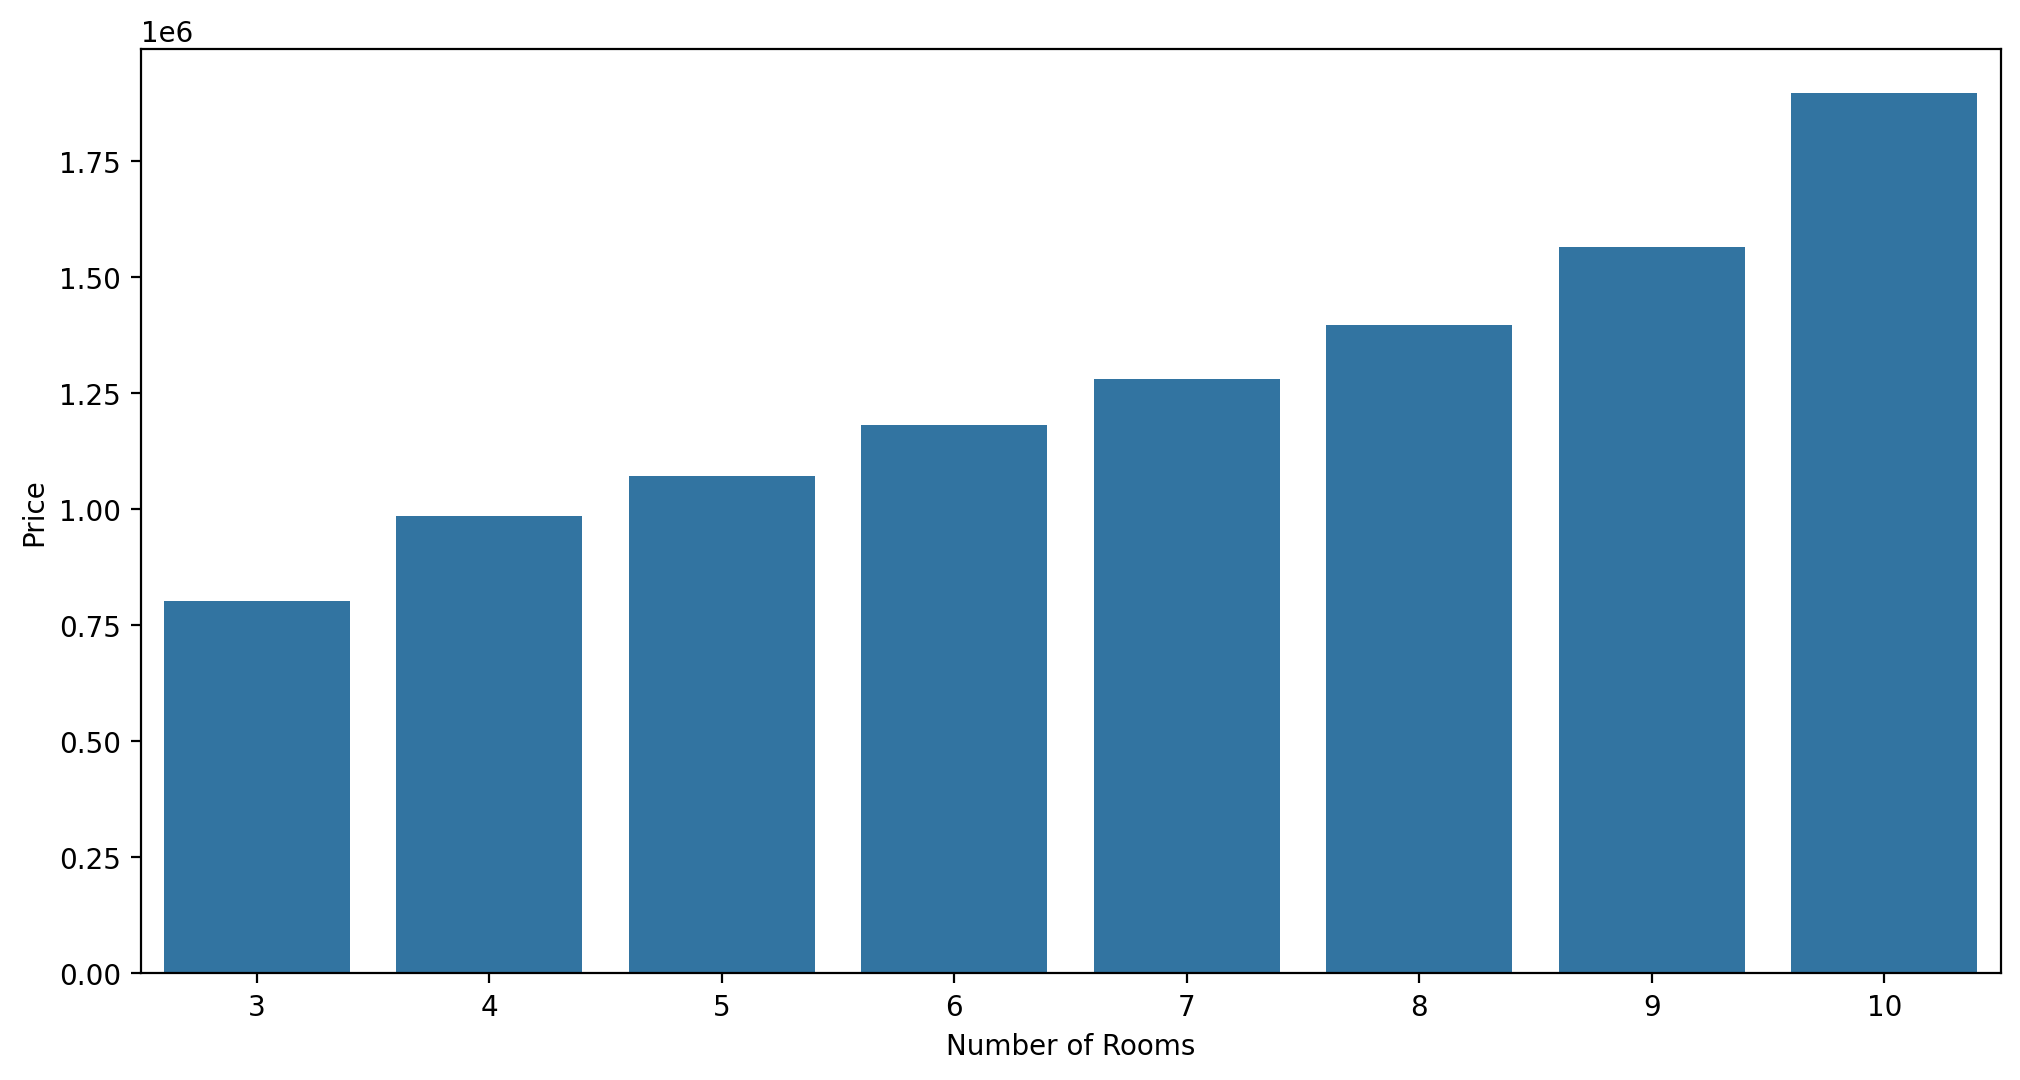

In [20]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Rooms', y = 'Price', data = df, ci = None)

In [21]:
df['Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].apply(int)

<Axes: xlabel='Number of Bedrooms', ylabel='Price'>

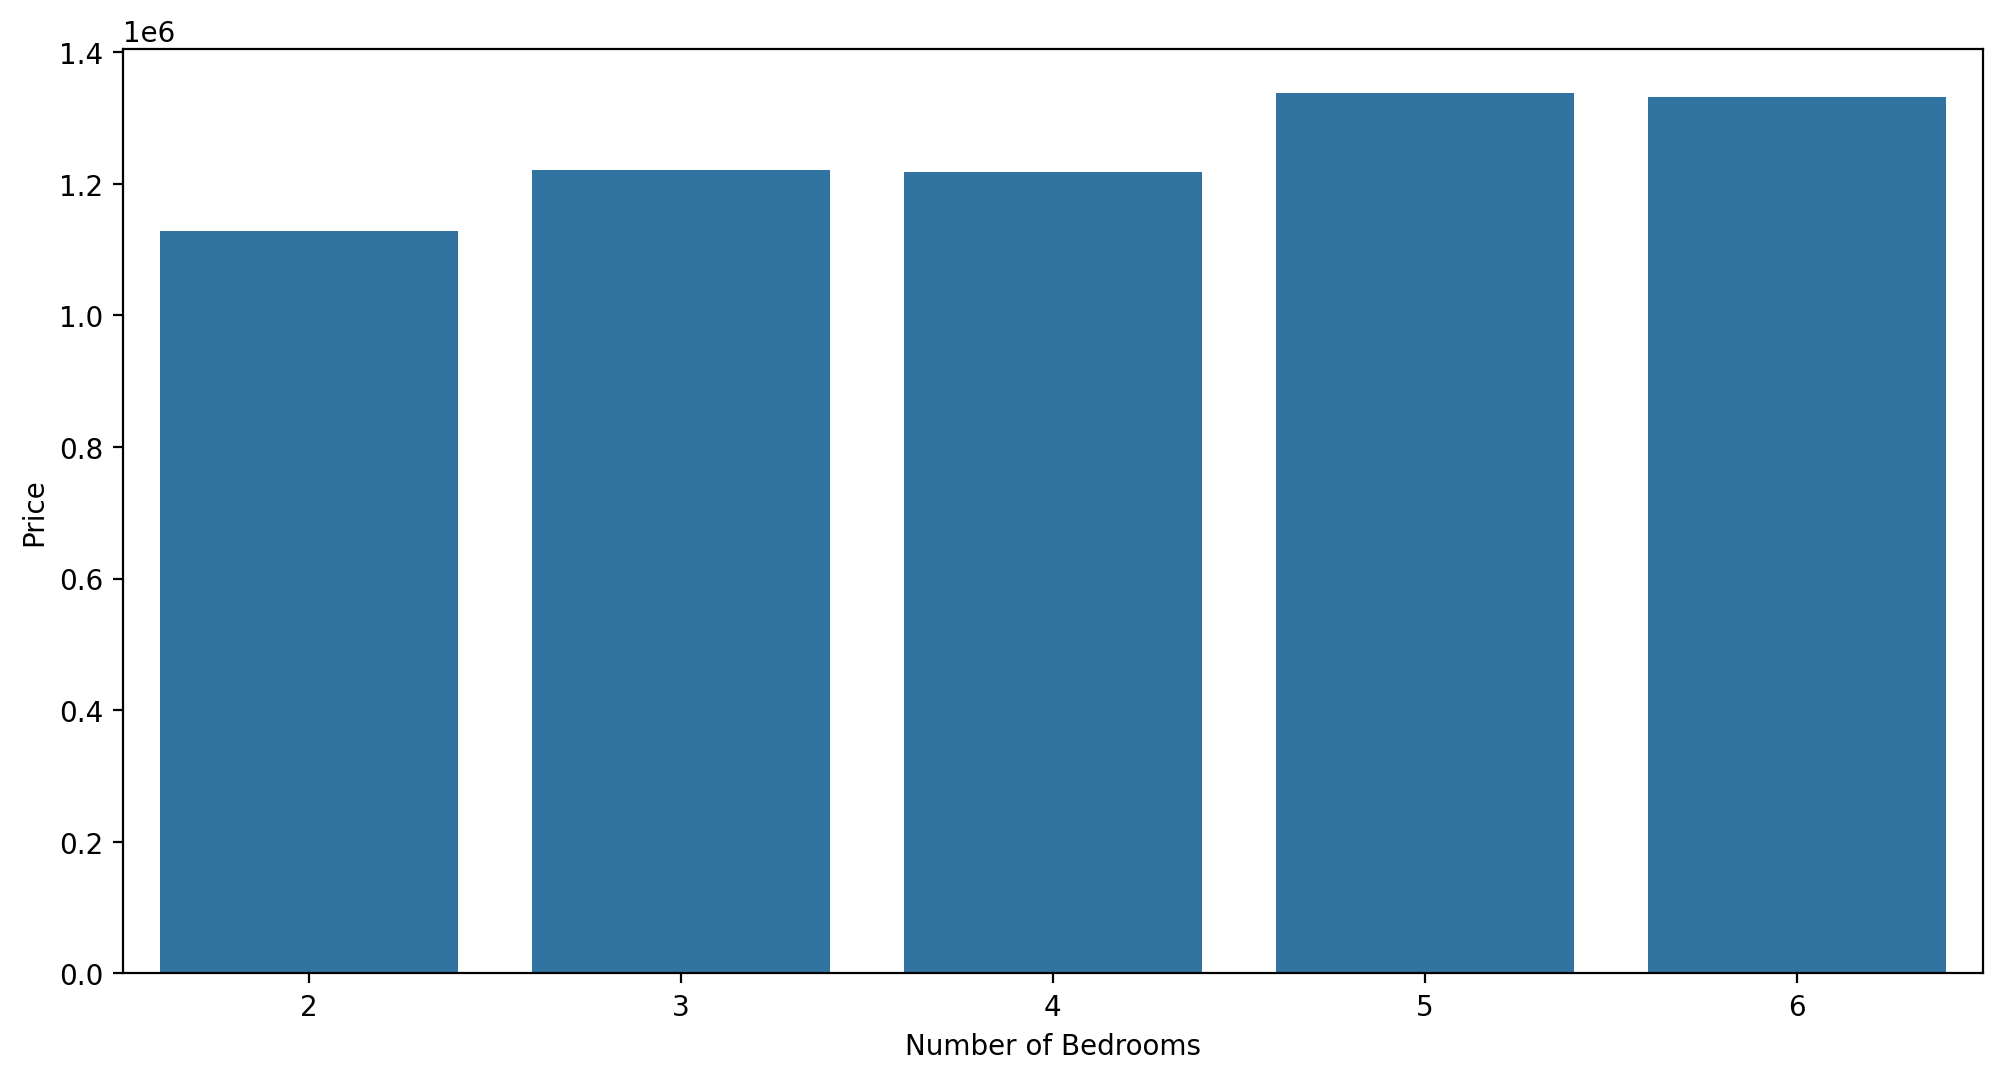

In [22]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Bedrooms', y = 'Price', data = df, ci = None)

### Обучение модели линейной регрессии

In [23]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address',
       'House Age', 'Number of Rooms', 'Number of Bedrooms'],
      dtype='object')

In [24]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [25]:
y = df['Price']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Линейная регрессия

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
lrm.intercept_

np.float64(-2638673.4261909947)

In [31]:
lrm.coef_

array([2.16257989e+01, 1.65590393e+05, 1.19827783e+05, 2.36109526e+03,
       1.52165814e+01])

In [32]:
predictions = lrm.predict(X_test)

In [33]:
predictions

array([1308536.13592613, 1237122.7274647 , 1243835.62817072, ...,
       1457119.79297235, 1483428.95309343, 1047510.59737188],
      shape=(1500,))

In [34]:
y_test.round(3)

1501   1339096.0770
2586   1251794.1790
2653   1340094.9660
1055   1431507.6230
705    1042373.5240
           ...     
3563   1348221.7650
1538   1309937.3990
1837   1472887.2470
2380   1409762.1190
1912   1009606.2840
Name: Price, Length: 1500, dtype: float64

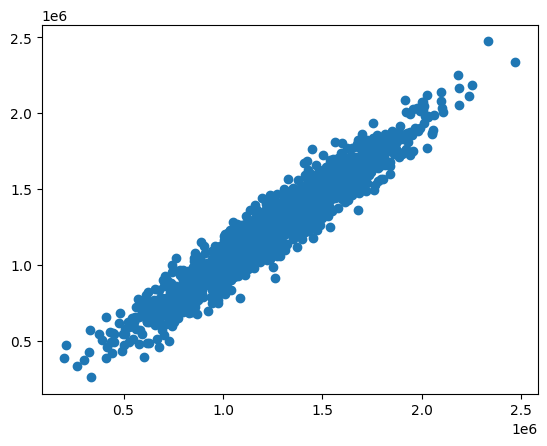

In [35]:
plt.scatter(y_test, predictions)

<Axes: xlabel='Price'>

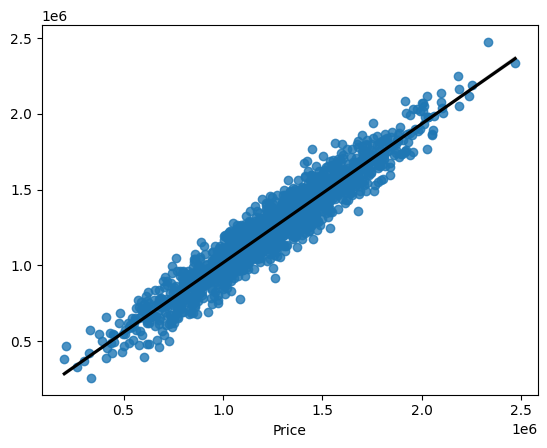

In [36]:
sns.regplot(x=y_test,y=predictions,line_kws={"color":"black"})

<Axes: xlabel='Price', ylabel='Density'>

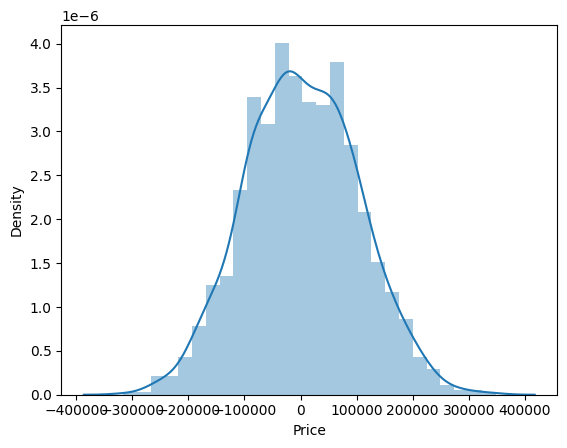

In [37]:
sns.distplot((y_test - predictions))

### Метрики оценки качества регрессии


Общие показатели оценки для задач регрессии:

**Mean Absolute Error** (MAE Средняя абсолютная ошибка) - это среднее значение абсолютного значения ошибок:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE Среднеквадратическая ошибка) - это среднее значение квадратов ошибок:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE Среднеквадратическая ошибка) - это квадратный корень из среднего квадрата ошибок:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Коэффициент детерминации** $R^{2}$

$$R^2 = 1 - \frac{\frac{1}{n}\sum^{n}_{i}{(y - y_{pred})^2}}{\frac{1}{n}\sum^{n}_{i}{(y - \bar{y})^2}}$$

In [38]:
from sklearn import metrics

In [39]:
metrics.mean_absolute_error(y_test, predictions)

81135.56609336878

In [40]:
metrics.mean_squared_error(y_test, predictions)

10068422551.401009

In [41]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

np.float64(100341.529544855)

In [42]:
metrics.r2_score(y_test, predictions)

0.9146818498754006

Подготовка данных

In [43]:
from sklearn.preprocessing import StandardScaler

# Разделение данных (уже выполнено ранее, но повторим для полноты)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [44]:
# Нормализация признаков
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Нормализация целевой переменной (рекомендуется для регрессии)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [45]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Определяем архитектуру нейросети
model = models.Sequential([
    # Входной слой (5 признаков)
    layers.Input(shape=(5,)),
    
    # Скрытые слои с регуляризацией для предотвращения переобучения
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.15),
    
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    
    layers.Dense(16, activation='relu'),
    
    # Выходной слой (регрессия - один нейрон без активации)
    layers.Dense(1)
])

2026-01-28 12:39:34.852221: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [46]:

# Компиляция модели
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',  # Mean Squared Error - стандартная функция потерь для регрессии
    metrics=['mae']  # Mean Absolute Error для интерпретации
)

In [47]:
# Вывод структуры модели
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,097 (47.25 KB)

 Non-trainable params: 448 (1.75 KB)

In [48]:
# Колбэк для ранней остановки при отсутствии улучшений
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

In [49]:
# Обучение модели
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,  # 20% данных для валидации
    epochs=150,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3760 - mae: 0.4761 - val_loss: 0.6891 - val_mae: 0.6785
Epoch 2/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2128 - mae: 0.3668 - val_loss: 0.4704 - val_mae: 0.5622
Epoch 3/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1966 - mae: 0.3495 - val_loss: 0.2644 - val_mae: 0.4163
Epoch 4/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1766 - mae: 0.3325 - val_loss: 0.1691 - val_mae: 0.3365
Epoch 5/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1682 - mae: 0.3259 - val_loss: 0.1232 - val_mae: 0.2860
Epoch 6/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1617 - mae: 0.3205 - val_loss: 0.1005 - val_mae: 0.2589
Epoch 7/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1571 - mae: 0.3161 - val_loss: 0.0847 - val_mae: 0.2341
Epoch 8/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1546 - mae: 0.3137 - val_loss: 0.0864 - val_mae: 0.2356
Epoch 9/150
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.146

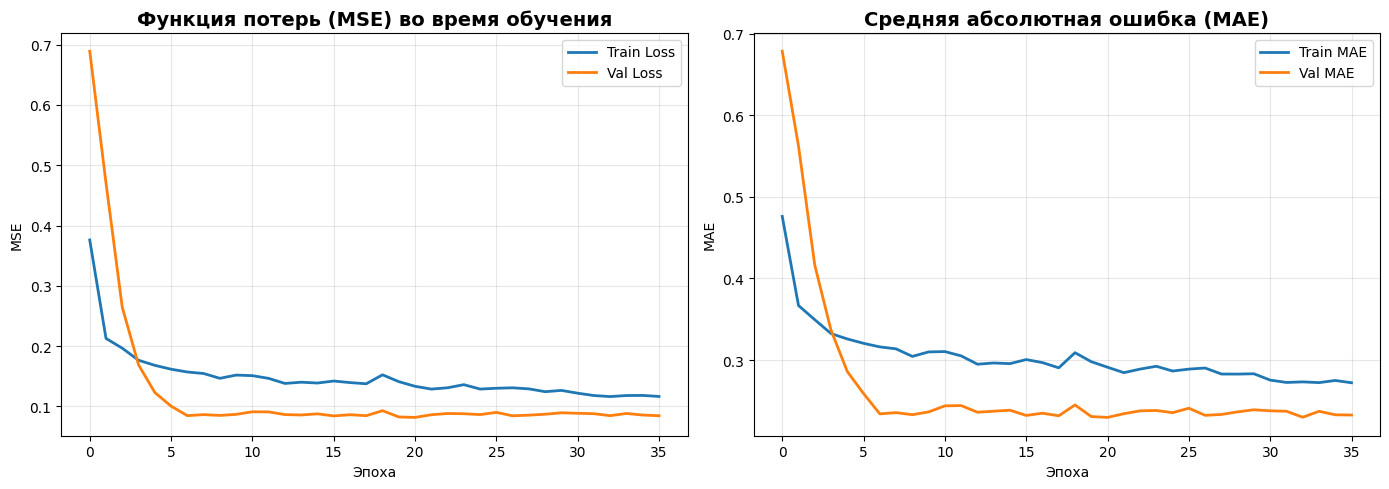

In [50]:
# Функция для визуализации истории обучения
def plot_training_history(history):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # График функции потерь
    axes[0].plot(history.history['loss'], label='Train Loss', linewidth=2)
    axes[0].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
    axes[0].set_title('Функция потерь (MSE) во время обучения', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Эпоха')
    axes[0].set_ylabel('MSE')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # График MAE
    axes[1].plot(history.history['mae'], label='Train MAE', linewidth=2)
    axes[1].plot(history.history['val_mae'], label='Val MAE', linewidth=2)
    axes[1].set_title('Средняя абсолютная ошибка (MAE)', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Эпоха')
    axes[1].set_ylabel('MAE')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)

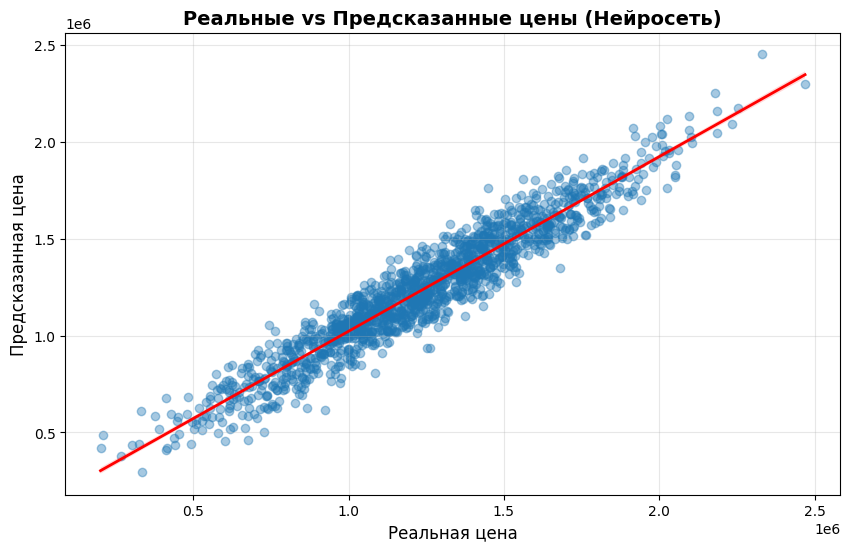

In [51]:
# Предсказание на тестовых данных
y_pred_scaled = model.predict(X_test_scaled, verbose=0).flatten()

# Обратное преобразование масштаба к исходным значениям цен
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Визуализация предсказаний vs реальных значений
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test_original, y=y_pred, scatter_kws={'alpha':0.4}, line_kws={"color":"red", "linewidth":2})
plt.xlabel('Реальная цена', fontsize=12)
plt.ylabel('Предсказанная цена', fontsize=12)
plt.title('Реальные vs Предсказанные цены (Нейросеть)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

In [52]:
# Расчёт метрик качества
mae_nn = metrics.mean_absolute_error(y_test_original, y_pred)
mse_nn = metrics.mean_squared_error(y_test_original, y_pred)
rmse_nn = np.sqrt(mse_nn)
r2_nn = metrics.r2_score(y_test_original, y_pred)

print("Метрики качества нейросети:")
print(f"MAE (Средняя абсолютная ошибка): ${mae_nn:,.2f}")
print(f"MSE (Среднеквадратичная ошибка): ${mse_nn:,.2f}")
print(f"RMSE (Корень из MSE): ${rmse_nn:,.2f}")
print(f"R² (Коэффициент детерминации): {r2_nn:.4f}")

# Сравнение с линейной регрессией
print("\nСравнение с линейной регрессией:")
print(f"Линейная регрессия - R²: 0.9147, MAE: $81,135.57")
print(f"Нейросеть          - R²: {r2_nn:.4f}, MAE: ${mae_nn:,.2f}")

Метрики качества нейросети:
MAE (Средняя абсолютная ошибка): $84,047.32
MSE (Среднеквадратичная ошибка): $10,713,937,759.17
RMSE (Корень из MSE): $103,508.15
R² (Коэффициент детерминации): 0.9092

Сравнение с линейной регрессией:
Линейная регрессия - R²: 0.9147, MAE: $81,135.57
Нейросеть          - R²: 0.9092, MAE: $84,047.32


# Вывод: Для задач с линейными зависимостями и небольшими данными простые модели часто работают лучше — это не недостаток нейросети, а особенность задачи.